In [1]:
!pip install statsbombpy

In [2]:
#import packages
from statsbombpy import sb
import pandas as pd

In [77]:
#load data
matches = sb.matches(competition_id=2, season_id=27)
matches.head()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3754058,2016-01-02,16:00:00.000,England - Premier League,2015/2016,Leicester City,AFC Bournemouth,0,0,available,...,2021-06-12T16:17:31.694,20,Regular Season,King Power Stadium,Andre Marriner,Claudio Ranieri,Eddie Howe,1.1.0,2,2
1,3754245,2015-10-17,16:00:00.000,England - Premier League,2015/2016,West Bromwich Albion,Sunderland,1,0,available,...,2021-06-13T16:17:31.694,9,Regular Season,The Hawthorns,Martin Atkinson,Tony Pulis,Sam Allardyce,1.1.0,2,2
2,3754136,2015-12-19,18:30:00.000,England - Premier League,2015/2016,Newcastle United,Aston Villa,1,1,available,...,2021-06-13T16:17:31.694,17,Regular Season,St. James'' Park,Martin Atkinson,Steve McClaren,Rémi Garde,1.1.0,2,2
3,3754037,2016-04-30,16:00:00.000,England - Premier League,2015/2016,Everton,AFC Bournemouth,2,1,available,...,2021-06-12T16:17:31.694,36,Regular Season,Goodison Park,Neil Swarbrick,Roberto Martínez Montoliú,Eddie Howe,1.1.0,2,2
4,3754039,2016-02-13,16:00:00.000,England - Premier League,2015/2016,Crystal Palace,Watford,1,2,available,...,2021-06-12T16:17:31.694,26,Regular Season,Selhurst Park,Robert Madley,Alan Pardew,Enrique Sánchez Flores,1.1.0,2,2


In [6]:
import pandas as pd

all_passes = pd.DataFrame()


for match_id in matches['match_id']:
    events = sb.events(match_id=match_id)
    match_passes = events[events['type'] == 'Pass']
    all_passes = pd.concat([all_passes, match_passes], ignore_index=True)

print(all_passes)


/Users/megheaiani/anaconda3/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/megheaiani/anaconda3/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/megheaiani/anaconda3/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/megheaiani/anaconda3/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/megheaiani/anaconda3/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/megheaiani/anaconda3/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open da

       ball_receipt_outcome ball_recovery_recovery_failure carry_end_location  \
0                       NaN                            NaN                NaN   
1                       NaN                            NaN                NaN   
2                       NaN                            NaN                NaN   
3                       NaN                            NaN                NaN   
4                       NaN                            NaN                NaN   
...                     ...                            ...                ...   
368614                  NaN                            NaN                NaN   
368615                  NaN                            NaN                NaN   
368616                  NaN                            NaN                NaN   
368617                  NaN                            NaN                NaN   
368618                  NaN                            NaN                NaN   

       clearance_aerial_won

In [109]:
# List to store tactics data across all matches
tactics_all_matches = []

# Loop through each match
for match_id in matches['match_id'][:5]:
    events = sb.events(match_id=match_id)
    
    # Filter for Tactics events
    tactics = events['tactics'].dropna()
    
    for row in tactics:
        
        formation = row['formation']
        lineup = row['lineup']
        
        # Extract lineup information for the team
        for player_info in lineup:
            tactics_all_matches.append({
                'match_id': match_id,
                'formation': formation,
                'player_id': player_info['player']['id'],
                'player_name': player_info['player']['name'],
                'position_id': player_info['position']['id'],
                'position_name': player_info['position']['name'],
                'jersey_number': player_info['jersey_number']
            })

# Convert collected data into a DataFrame
tactics_df = pd.DataFrame(tactics_all_matches)

# Display the first few rows of the DataFrame
print(tactics_df.head())


/Users/megheaiani/anaconda3/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/megheaiani/anaconda3/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/megheaiani/anaconda3/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/megheaiani/anaconda3/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


   match_id  formation  player_id        player_name  position_id  \
0   3754058        442       3815  Kasper Schmeichel            1   
1   3754058        442       3270      Danny Simpson            2   
2   3754058        442       3813         Wes Morgan            3   
3   3754058        442      40123        Robert Huth            5   
4   3754058        442       3812    Christian Fuchs            6   

       position_name  jersey_number  
0         Goalkeeper              1  
1         Right Back             17  
2  Right Center Back              5  
3   Left Center Back              6  
4          Left Back             28  


In [110]:
# Merge tactics with passes
all_passes = all_passes.merge(tactics_df, on=['match_id', 'player_id'], how='left')





In [165]:
unique_formations = tactics_df['formation'].unique()
print(unique_formations)

[  442  4141  4231 41212   433]


In [12]:

# existing features
for col in all_passes.columns:
    print(col)

ball_receipt_outcome
ball_recovery_recovery_failure
carry_end_location
clearance_aerial_won
clearance_body_part
clearance_head
clearance_left_foot
clearance_right_foot
counterpress
dribble_nutmeg
dribble_outcome
dribble_overrun
duel_outcome
duel_type
duration
foul_committed_advantage
foul_committed_card
foul_committed_offensive
foul_committed_penalty
foul_committed_type
foul_won_advantage
foul_won_defensive
foul_won_penalty
goalkeeper_body_part
goalkeeper_end_location
goalkeeper_outcome
goalkeeper_position
goalkeeper_punched_out
goalkeeper_technique
goalkeeper_type
id
index
interception_outcome
location
match_id
minute
miscontrol_aerial_won
off_camera
out
pass_aerial_won
pass_angle
pass_assisted_shot_id
pass_body_part
pass_cross
pass_cut_back
pass_deflected
pass_end_location
pass_height
pass_inswinging
pass_length
pass_outcome
pass_outswinging
pass_recipient
pass_recipient_id
pass_shot_assist
pass_switch
pass_technique
pass_through_ball
pass_type
period
play_pattern
player
player_id
po

In [151]:
# Drop columns where all values are NaN
all_passes = all_passes.dropna(axis=1, how='all')

# Print the remaining columns
print(all_passes.columns)


Index(['counterpress', 'duration', 'id', 'index', 'location', 'match_id',
       'minute', 'off_camera', 'out', 'pass_aerial_won', 'pass_angle',
       'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_deflected', 'pass_end_location', 'pass_height',
       'pass_inswinging', 'pass_length', 'pass_outcome', 'pass_outswinging',
       'pass_recipient', 'pass_recipient_id', 'pass_shot_assist',
       'pass_switch', 'pass_technique', 'pass_through_ball', 'pass_type',
       'period', 'play_pattern', 'player', 'player_id', 'position',
       'possession', 'possession_team', 'possession_team_id', 'related_events',
       'second', 'team', 'team_id', 'timestamp', 'type', 'under_pressure',
       'pass_goal_assist', 'pass_straight', 'pass_no_touch',
       'pass_miscommunication', 'formation', 'player_name', 'position_id',
       'position_name', 'jersey_number'],
      dtype='object')


In [174]:
print(all_passes['pass_goal_assist'].value_counts())

True    669
Name: pass_goal_assist, dtype: int64


In [172]:
# Print locations for the first 5 passes
for i, row in all_passes.head(5).iterrows():
    print(f"Pass {i+1}: Start = ({row['location']}), End = ({row['pass_end_location']})")
for i, row in all_passes.head(5).iterrows():
    print(f"Pass {i+1}: Player: {row['player']}")
    print(f"Pass {i+1}: Team: {row['team']}")

Pass 1: Start = ([61.0, 40.1]), End = ([60.4, 43.6])
Pass 3: Start = ([60.4, 43.6]), End = ([48.0, 41.7])
Pass 4: Start = ([48.0, 41.7]), End = ([37.5, 76.1])
Pass 6: Start = ([37.5, 74.6]), End = ([27.4, 58.1])
Pass 8: Start = ([27.4, 63.9]), End = ([35.1, 77.8])
Pass 1: Player: Dan Gosling
Pass 1: Team: AFC Bournemouth
Pass 3: Player: Joshua King
Pass 3: Team: AFC Bournemouth
Pass 4: Player: Andrew Surman
Pass 4: Team: AFC Bournemouth
Pass 6: Player: Adam Smith
Pass 6: Team: AFC Bournemouth
Pass 8: Player: Simon Francis
Pass 8: Team: AFC Bournemouth


In [170]:
all_passes.to_csv('all_passes.csv', index=False)

In [169]:
all_passes = all_passes.drop_duplicates(subset='id', keep='first')


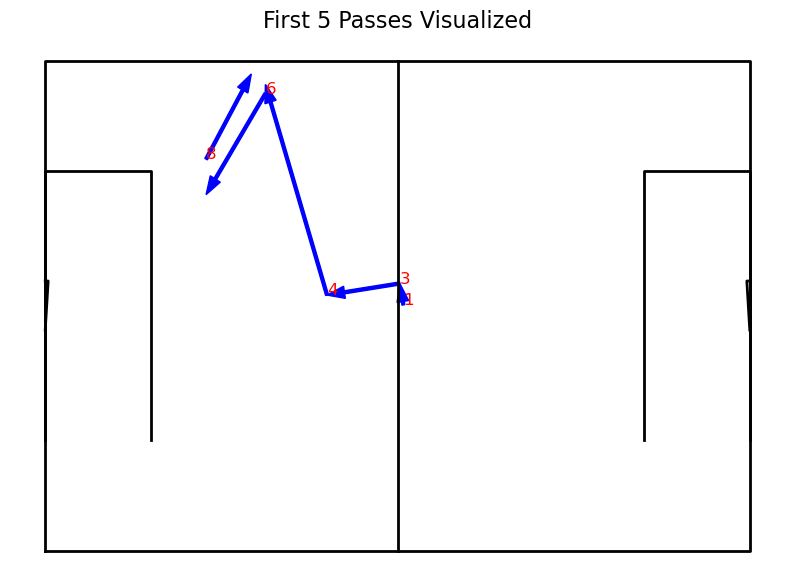

In [171]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrow

# Extract the first 5 passes
passes = all_passes.head(5)

# Define pitch dimensions (StatsBomb uses a 120x80 field)
pitch_length = 120
pitch_width = 80

# Create a function to draw the pitch
def draw_pitch(ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
    # Pitch outline and center line
    ax.plot([0, 0, pitch_length, pitch_length, 0], [0, pitch_width, pitch_width, 0, 0], color="black", lw=2)
    ax.plot([pitch_length/2, pitch_length/2], [0, pitch_width], color="black", lw=2)

    # Left penalty area
    ax.plot([18, 18, 0, 0], [18, pitch_width - 18, pitch_width - 18, 18], color="black", lw=2)
    # Right penalty area
    ax.plot([pitch_length - 18, pitch_length - 18, pitch_length, pitch_length], 
            [18, pitch_width - 18, pitch_width - 18, 18], color="black", lw=2)

    # Goal posts
    ax.plot([0, 0.5, 0], [36, 44, 44], color="black", lw=2)
    ax.plot([pitch_length, pitch_length - 0.5, pitch_length], 
            [36, 44, 44], color="black", lw=2)

    # Turn off axes
    ax.axis("off")
    return ax

# Plot the passes
fig, ax = plt.subplots(figsize=(10, 7))
draw_pitch(ax)

for i, row in passes.iterrows():
    start_x, start_y = row['location']  # Start coordinates
    end_x, end_y = row['pass_end_location']  # End coordinates
    
    # Draw the pass as an arrow
    ax.add_patch(FancyArrow(start_x, start_y, end_x - start_x, end_y - start_y, 
                            color='blue', width=0.5, head_width=2, length_includes_head=True))
    
    # Add a label for the pass number
    ax.text(start_x, start_y, f"{i+1}", color="red", fontsize=12)

ax.set_title("First 5 Passes Visualized", fontsize=16)
plt.show()
